In [151]:
#Introduction to sympy

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import math

In [24]:
l_1 = sp.Symbol('l_1')
l_2 = sp.Symbol('l_2')
l_3 = sp.Symbol('l_3')
t = sp.Symbol('t')
C = sp.Symbol('C')
theta_1 = sp.Symbol('theta_1')
theta_2 = sp.Symbol('theta_2')
theta_3 = sp.Symbol('theta_3')


In [13]:
#Equations for end effector x, y, and theta
x_ee = l_1*sp.cos(theta_1) + l_2*sp.cos(theta_1+theta_2) + l_3*sp.cos(theta_1+theta_2+theta_3)
y_ee = l_1*sp.sin(theta_1) + l_2*sp.sin(theta_1+theta_2) + l_3*sp.sin(theta_1+theta_2+theta_3)
theta_ee = theta_1+theta_2+theta_3

theta_1 + theta_2 + theta_3

In [17]:
#Create vectors for position and angles
position_ee = sp.Matrix([x_ee, y_ee, theta_ee])
theta_vector = sp.Matrix([theta_1, theta_2, theta_3])
#Create jacobian from position and angle vectors
J = position_ee.jacobian(theta_vector)
J

Matrix([
[-l_1*sin(theta_1) - l_2*sin(theta_1 + theta_2) - l_3*sin(theta_1 + theta_2 + theta_3), -l_2*sin(theta_1 + theta_2) - l_3*sin(theta_1 + theta_2 + theta_3), -l_3*sin(theta_1 + theta_2 + theta_3)],
[ l_1*cos(theta_1) + l_2*cos(theta_1 + theta_2) + l_3*cos(theta_1 + theta_2 + theta_3),  l_2*cos(theta_1 + theta_2) + l_3*cos(theta_1 + theta_2 + theta_3),  l_3*cos(theta_1 + theta_2 + theta_3)],
[                                                                                    1,                                                                  1,                                     1]])

In [18]:
J_inv = J.inv()
J_inv

Matrix([
[                                  cos(theta_1 + theta_2)/(-l_1*sin(theta_1)*cos(theta_1 + theta_2) + l_1*sin(theta_1 + theta_2)*cos(theta_1)),                                   sin(theta_1 + theta_2)/(-l_1*sin(theta_1)*cos(theta_1 + theta_2) + l_1*sin(theta_1 + theta_2)*cos(theta_1)),                                                                                                                                (-l_3*sin(theta_1 + theta_2)*cos(theta_1 + theta_2 + theta_3) + l_3*sin(theta_1 + theta_2 + theta_3)*cos(theta_1 + theta_2))/(-l_1*sin(theta_1)*cos(theta_1 + theta_2) + l_1*sin(theta_1 + theta_2)*cos(theta_1))],
[(-l_1*cos(theta_1) - l_2*cos(theta_1 + theta_2))/(-l_1*l_2*sin(theta_1)*cos(theta_1 + theta_2) + l_1*l_2*sin(theta_1 + theta_2)*cos(theta_1)), (-l_1*sin(theta_1) - l_2*sin(theta_1 + theta_2))/(-l_1*l_2*sin(theta_1)*cos(theta_1 + theta_2) + l_1*l_2*sin(theta_1 + theta_2)*cos(theta_1)), (l_1*l_3*sin(theta_1)*cos(theta_1 + theta_2 + theta_3) - l_1*l_3*sin(theta_1 +

In [26]:
#x and y equations based on desired circular path
x_c = 20*sp.cos((sp.pi/15)*t)
y_c = 20*sp.sin((sp.pi/15)*t)
#take derivatives to get x and y dot of circular path
xdot_c = sp.diff(x_c, t)
ydot_c = sp.diff(y_c, t)
position_c = sp.Matrix([x_c, y_c, 0])
velocity_c = sp.Matrix([xdot_c, ydot_c, 0])
thetadot_c = J_inv*velocity_c
thetadot_c

Matrix([
[                                                                   -4*pi*sin(pi*t/15)*cos(theta_1 + theta_2)/(3*(-l_1*sin(theta_1)*cos(theta_1 + theta_2) + l_1*sin(theta_1 + theta_2)*cos(theta_1))) + 4*pi*sin(theta_1 + theta_2)*cos(pi*t/15)/(3*(-l_1*sin(theta_1)*cos(theta_1 + theta_2) + l_1*sin(theta_1 + theta_2)*cos(theta_1)))],
[4*pi*(-l_1*sin(theta_1) - l_2*sin(theta_1 + theta_2))*cos(pi*t/15)/(3*(-l_1*l_2*sin(theta_1)*cos(theta_1 + theta_2) + l_1*l_2*sin(theta_1 + theta_2)*cos(theta_1))) - 4*pi*(-l_1*cos(theta_1) - l_2*cos(theta_1 + theta_2))*sin(pi*t/15)/(3*(-l_1*l_2*sin(theta_1)*cos(theta_1 + theta_2) + l_1*l_2*sin(theta_1 + theta_2)*cos(theta_1)))],
[                                                                                         -4*pi*sin(theta_1)*cos(pi*t/15)/(3*(l_2*sin(theta_1)*cos(theta_1 + theta_2) - l_2*sin(theta_1 + theta_2)*cos(theta_1))) + 4*pi*sin(pi*t/15)*cos(theta_1)/(3*(l_2*sin(theta_1)*cos(theta_1 + theta_2) - l_2*sin(theta_1 + theta_2)*cos(theta

In [193]:
subs_dict = {l_1:15, l_2:15, l_3:2, t:0, theta_1:0.64, theta_2:-1.28, theta_3:0.64}
thetadot_c_initial = thetadot_c.subs(subs_dict)
thetadot_c = thetadot_c.subs([(l_1, 15),(l_2, 15),(l_3, 2)])
thetadot1_eq = thetadot_c[0]
thetadot2_eq = thetadot_c[1]
thetadot3_eq = thetadot_c[2]


In [194]:
thetadot1_initial = thetadot_c_initial[0]
thetadot2_initial = thetadot_c_initial[1]
thetadot3_initial = thetadot_c_initial[2]
xdot_initial = xdot_c.subs(t, 0)
ydot_initial = ydot_c.subs(t,0)
x_initial = 20
y_initial = 0
theta1_initial = 0.64
theta2_initial = -1.28
theta3_initial = 0.64
duration = 30
increment = 0.1


In [195]:
arraysize = int(duration/increment)
time = np.arange(0, duration, increment)
theta1_array = [theta1_initial]*arraysize
theta2_array = [theta2_initial]*arraysize
theta3_array = [theta3_initial]*arraysize
x_array = [x_initial]*arraysize
y_array = [y_initial]*arraysize
thetadot1_array = [thetadot1_initial]*arraysize
thetadot2_array = [thetadot2_initial]*arraysize
thetadot3_array = [thetadot3_initial]*arraysize
xdot_array = [xdot_initial]*arraysize
ydot_array = [ydot_initial]*arraysize

In [196]:
for i in range(1, arraysize):
    theta1_array[i] = theta1_array[i-1]+(thetadot1_array[i-1]*increment)
    theta2_array[i] = theta2_array[i-1]+(thetadot2_array[i-1]*increment)
    theta3_array[i] = theta3_array[i-1]+(thetadot3_array[i-1]*increment)
    thetadot1_array[i] = (thetadot1_eq.subs([(t, time[i]), (theta_1, theta1_array[i]), (theta_2, theta2_array[i]), (theta_3, theta3_array[i])])).evalf(5)
    thetadot2_array[i] = (thetadot2_eq.subs([(t, time[i]), (theta_1, theta1_array[i]), (theta_2, theta2_array[i]), (theta_3, theta3_array[i])])).evalf(5)
    thetadot3_array[i] = (thetadot3_eq.subs([(t, time[i]), (theta_1, theta1_array[i]), (theta_2, theta2_array[i]), (theta_3, theta3_array[i])])).evalf(5)
    
    

(-17.909968423989348,
 28.435763706132185,
 -21.998363745198713,
 24.34736838492282)

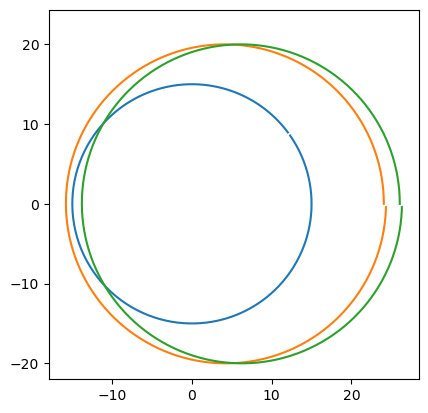

In [202]:
link1_x = [0]*arraysize
link1_y = [0]*arraysize
link2_x = [0]*arraysize
link2_y = [0]*arraysize
link3_x = [0]*arraysize
link3_y = [0]*arraysize
for i in range(arraysize):
    link1_x[i] = 15*sp.cos(theta1_array[i])
    link1_y[i] = 15*sp.sin(theta1_array[i])
    link2_x[i] = link1_x[i] + (15*sp.cos(theta1_array[i]+theta2_array[i]))
    link2_y[i] = link1_y[i] + (15*sp.sin(theta1_array[i]+theta2_array[i]))
    link3_x[i] = link2_x[i] + (2*sp.cos(theta1_array[i]+theta2_array[i]+theta3_array[i]))
    link3_y[i] = link2_y[i] + (2*sp.sin(theta1_array[i]+theta2_array[i]+theta3_array[i]))    


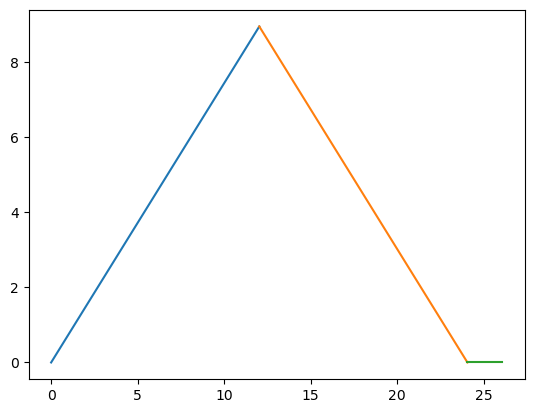

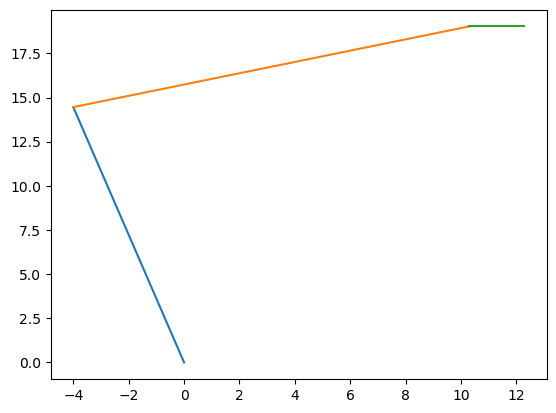

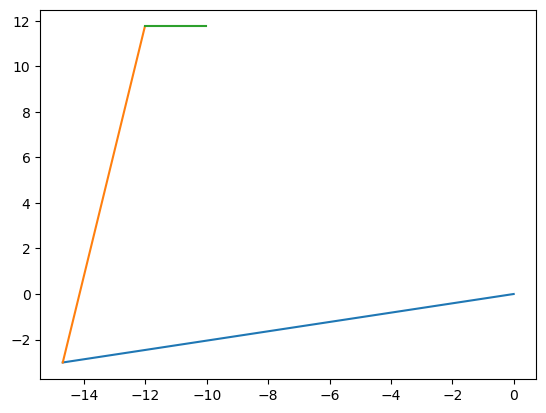

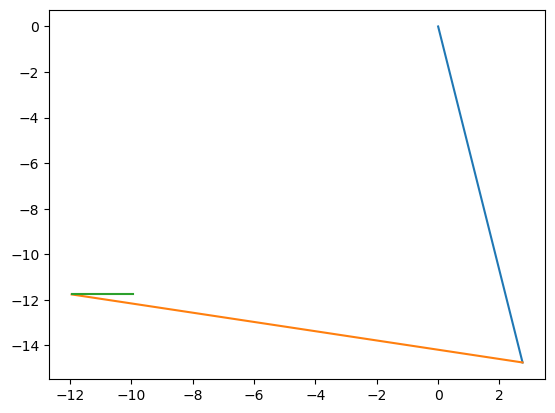

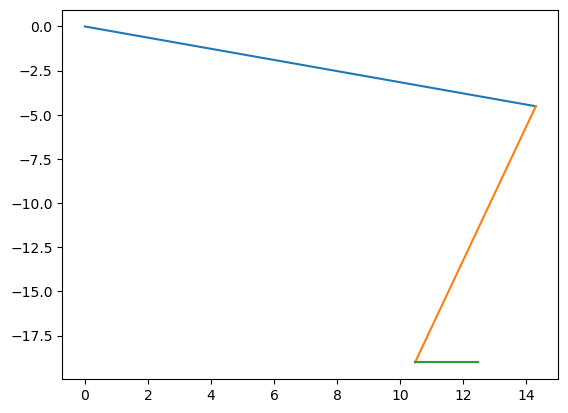

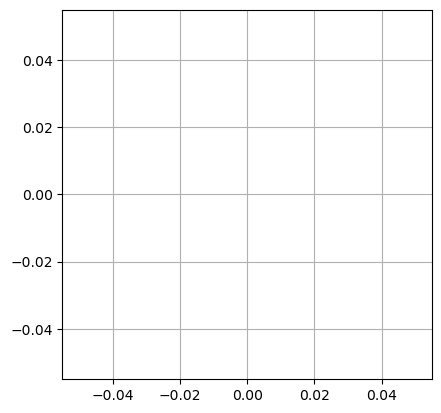

In [217]:
# plt.plot(link1_x, link1_y)
# plt.plot(link2_x, link2_y)
# plt.plot(link3_x, link3_y)
i = 0
while i < arraysize:
    plt.clf()
    plt.plot([0, link1_x[i]],[0, link1_y[i]])
    plt.plot([link1_x[i], link2_x[i]],[link1_y[i], link2_y[i]])
    plt.plot([link2_x[i],link3_x[i]],[link2_y[i], link3_y[i]])
    i = i+60
    plt.pause(1)
    


plt.axis('square')
plt.grid(True)